<a href="https://colab.research.google.com/github/RodrigoMachadodaSilva/Ci-cia-de-Dados-Projeto-Departamento-de-Vendas/blob/main/C%C3%B3pia_de_Projeto_Departamento_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Departamento de vendas

- Base de dados: https://www.kaggle.com/c/rossmann-store-sales/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importação das bibliotecas e base de dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### Dados das vendas

In [ ]:
dados_vendas = pd.read_csv('/content/drive/MyDrive/Cópia de train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
dados_vendas.shape

(1017209, 9)

In [ ]:
dados_vendas.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
dados_vendas.info

<bound method DataFrame.info of          Store  DayOfWeek        Date  ...  Promo  StateHoliday  SchoolHoliday
0            1          5  2015-07-31  ...      1             0              1
1            2          5  2015-07-31  ...      1             0              1
2            3          5  2015-07-31  ...      1             0              1
3            4          5  2015-07-31  ...      1             0              1
4            5          5  2015-07-31  ...      1             0              1
...        ...        ...         ...  ...    ...           ...            ...
1017204   1111          2  2013-01-01  ...      0             a              1
1017205   1112          2  2013-01-01  ...      0             a              1
1017206   1113          2  2013-01-01  ...      0             a              1
1017207   1114          2  2013-01-01  ...      0             a              1
1017208   1115          2  2013-01-01  ...      0             a              1

[1017209 rows x 9 c

In [ ]:
dados_vendas.rename(columns={'Store':'ID_LOJA','DayOfWeek':'DIA_DA_SEMANA','Date':'DATA',
                             'Sales':'VENDAS','Customers':'NUMERO_DE_CLIENTES',
                             'Open':'ABERTA','StateHoliday':'OUTROS_FERIADOS',
                             'SchoolHoliday':'FERIADO_ESCOLAR','Promo':'PROMO'},inplace=True)

In [ ]:
dados_vendas.head()

,ID_LOJA,DIA_DA_SEMANA,DATA,VENDAS,NUMERO_DE_CLIENTES,ABERTA,PROMO,OUTROS_FERIADOS,FERIADO_ESCOLAR
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
dados_vendas['DIA_DA_SEMANA'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [ ]:
dados_vendas['ABERTA'].unique()

array([1, 0])

In [ ]:
dados_vendas['PROMO'].unique()

array([1, 0])

In [ ]:
dados_vendas['OUTROS_FERIADOS'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
dados_vendas['FERIADO_ESCOLAR'].unique()

array([1, 0])

In [ ]:
dados_vendas.tail()

,ID_LOJA,DIA_DA_SEMANA,DATA,VENDAS,NUMERO_DE_CLIENTES,ABERTA,PROMO,OUTROS_FERIADOS,FERIADO_ESCOLAR
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   ID_LOJA             1017209 non-null  int64 
 1   DIA_DA_SEMANA       1017209 non-null  int64 
 2   DATA                1017209 non-null  object
 3   VENDAS              1017209 non-null  int64 
 4   NUMERO_DE_CLIENTES  1017209 non-null  int64 
 5   ABERTA              1017209 non-null  int64 
 6   PROMO               1017209 non-null  int64 
 7   OUTROS_FERIADOS     1017209 non-null  object
 8   FERIADO_ESCOLAR     1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
dados_vendas.describe()

,ID_LOJA,DIA_DA_SEMANA,VENDAS,NUMERO_DE_CLIENTES,ABERTA,PROMO,FERIADO_ESCOLAR
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Dados das lojas

In [ ]:
dados_loja = pd.read_csv('/content/drive/MyDrive/Cópia de store.csv')

In [ ]:
dados_loja.shape

(1115, 10)

In [ ]:
dados_loja.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
dados_loja.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
dados_loja = dados_loja.rename(columns={'Store':'ID_LOJA', 'StoreType':'TIPO_DA_LOJA',
                                        'Assortment':'CATEGORIA_DA_LOJA',
                                        'CompetitionDistance':'DISTANCIA_DO_CONCORRENTE',
                                        'CompetitionOpenSinceMonth':'MES_INAUGURACAO_CONCORRENTE',
                                        'CompetitionOpenSinceYear':'ANO_INAUGURACAO_CONCORRENTE', 
                                        'Promo2':'PROMOCAO2','Promo2SinceWeek':'PROMOMOCAO_2_SEMANA',
                                        'Promo2SinceYear':'PROMOÇAO_2_ANO', 'PromoInterval':'INTERVALO_DA_PROMOÇAO'})

In [ ]:
dados_loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID_LOJA                      1115 non-null   int64  
 1   TIPO_DA_LOJA                 1115 non-null   object 
 2   CATEGORIA_DA_LOJA            1115 non-null   object 
 3   DISTANCIA_DO_CONCORRENTE     1112 non-null   float64
 4   MES_INAUGURACAO_CONCORRENTE  761 non-null    float64
 5   ANO_INAUGURACAO_CONCORRENTE  761 non-null    float64
 6   PROMOCAO2                    1115 non-null   int64  
 7   PROMOMOCAO_2_SEMANA          571 non-null    float64
 8   PROMOÇAO_2_ANO               571 non-null    float64
 9   INTERVALO_DA_PROMOÇAO        571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
dados_loja.describe()

,ID_LOJA,DISTANCIA_DO_CONCORRENTE,MES_INAUGURACAO_CONCORRENTE,ANO_INAUGURACAO_CONCORRENTE,PROMOCAO2,PROMOMOCAO_2_SEMANA,PROMOÇAO_2_ANO
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Exploração dos dados

### Dados das vendas

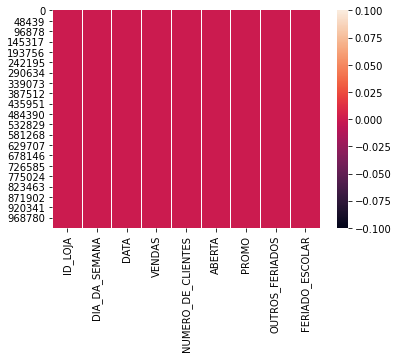

In [ ]:
sns.heatmap(dados_vendas.isnull());

In [ ]:
dados_vendas.isnull().sum()

ID_LOJA               0
DIA_DA_SEMANA         0
DATA                  0
VENDAS                0
NUMERO_DE_CLIENTES    0
ABERTA                0
PROMO                 0
OUTROS_FERIADOS       0
FERIADO_ESCOLAR       0
dtype: int64

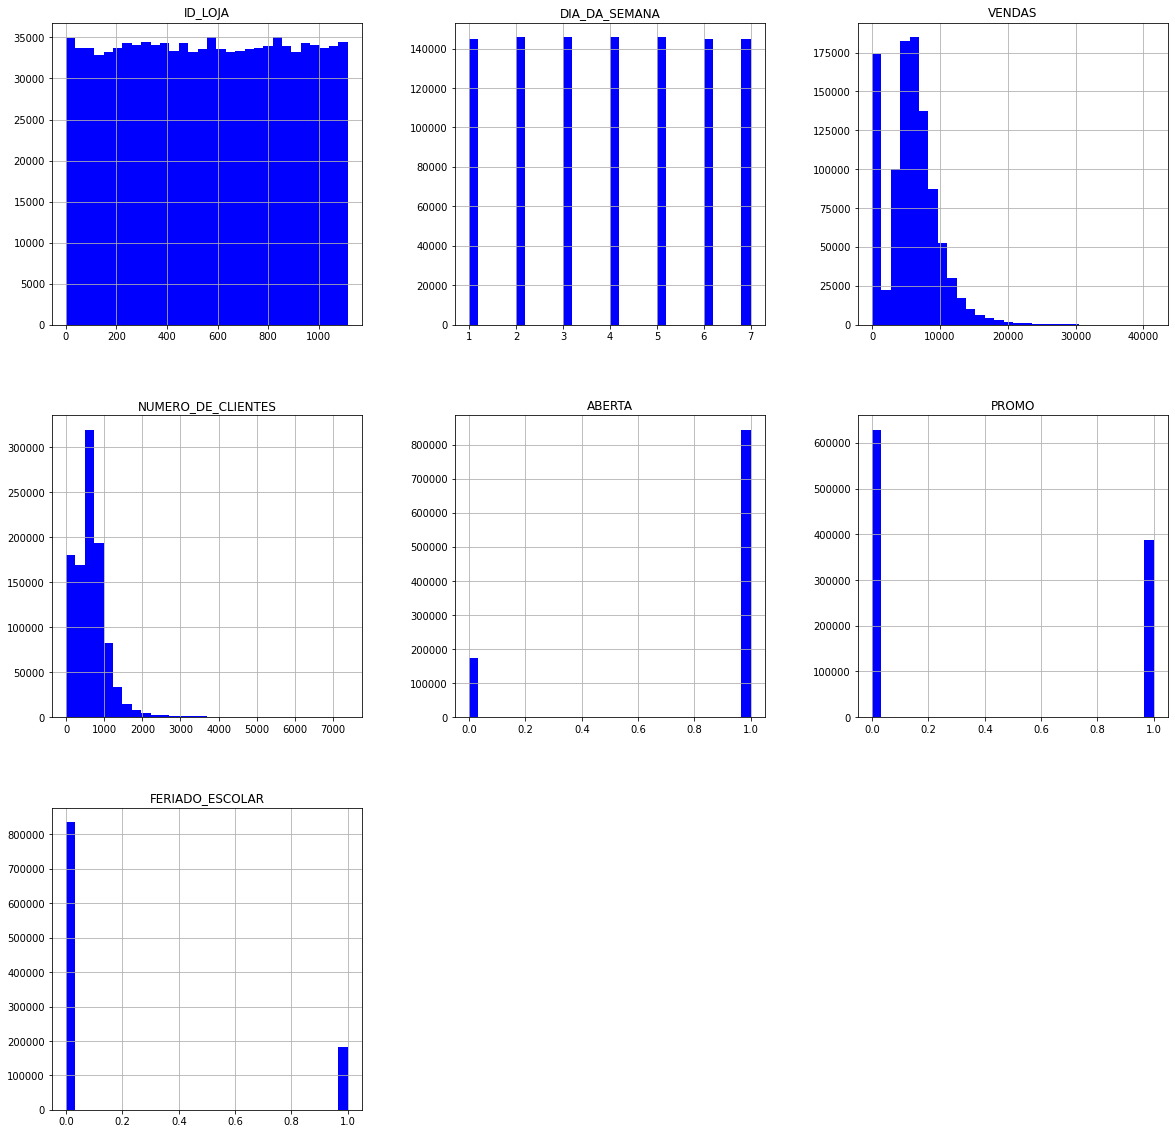

In [ ]:
dados_vendas.hist(bins = 30, figsize=(20, 20), color = 'b');

In [ ]:
dados_vendas['NUMERO_DE_CLIENTES'].max()

7388

In [ ]:
dados_lojas_fechadas = dados_vendas[dados_vendas['ABERTA'] == 0]
dados_lojas_abertas= dados_vendas[dados_vendas['ABERTA'] == 1]

In [ ]:
print('Total = ', len(dados_vendas))
print('Número de lojas/dias fechado = ', len(dados_lojas_fechadas))
print('Número de lojas/dias aberto = ', len(dados_lojas_abertas))

Total =  1017209
Número de lojas/dias fechado =  172817
Número de lojas/dias aberto =  844392


In [ ]:
dados_lojas_fechadas.head()

,ID_LOJA,DIA_DA_SEMANA,DATA,VENDAS,NUMERO_DE_CLIENTES,ABERTA,PROMO,OUTROS_FERIADOS,FERIADO_ESCOLAR
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


In [ ]:
dados_lojas_abertas.drop(['ABERTA'], axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dados_lojas_abertas.head()

,ID_LOJA,DIA_DA_SEMANA,DATA,VENDAS,NUMERO_DE_CLIENTES,PROMO,OUTROS_FERIADOS,FERIADO_ESCOLAR
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [ ]:
dados_lojas_abertas.describe()

,ID_LOJA,DIA_DA_SEMANA,VENDAS,NUMERO_DE_CLIENTES,PROMO,FERIADO_ESCOLAR
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


In [ ]:
dados_lojas_abertas[dados_lojas_abertas['VENDAS'] ==0]

,ID_LOJA,DIA_DA_SEMANA,DATA,VENDAS,NUMERO_DE_CLIENTES,PROMO,OUTROS_FERIADOS,FERIADO_ESCOLAR
86825,971,5,2015-05-15,0,0,0,0,1
142278,674,4,2015-03-26,0,0,0,0,0
196938,699,4,2015-02-05,0,0,1,0,0
322053,708,3,2014-10-01,0,0,1,0,0
330176,357,1,2014-09-22,0,0,0,0,0
340348,227,4,2014-09-11,0,0,0,0,0
340860,835,4,2014-09-11,0,0,0,0,0
341795,835,3,2014-09-10,0,0,0,0,0
346232,548,5,2014-09-05,0,0,1,0,1
346734,28,4,2014-09-04,0,0,1,0,0


### Dados das lojas

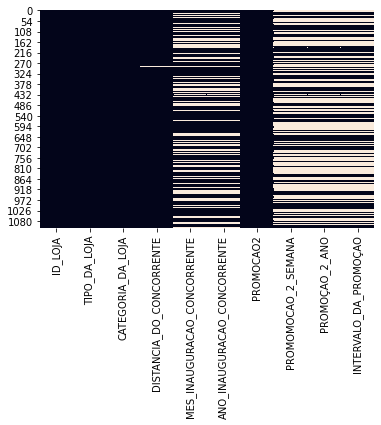

In [ ]:
sns.heatmap(dados_loja.isnull(), cbar=False);

In [ ]:
dados_loja[dados_loja['DISTANCIA_DO_CONCORRENTE'].isnull()]

,ID_LOJA,TIPO_DA_LOJA,CATEGORIA_DA_LOJA,DISTANCIA_DO_CONCORRENTE,MES_INAUGURACAO_CONCORRENTE,ANO_INAUGURACAO_CONCORRENTE,PROMOCAO2,PROMOMOCAO_2_SEMANA,PROMOÇAO_2_ANO,INTERVALO_DA_PROMOÇAO
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
dados_loja[dados_loja['MES_INAUGURACAO_CONCORRENTE'].isnull()]

,ID_LOJA,TIPO_DA_LOJA,CATEGORIA_DA_LOJA,DISTANCIA_DO_CONCORRENTE,MES_INAUGURACAO_CONCORRENTE,ANO_INAUGURACAO_CONCORRENTE,PROMOCAO2,PROMOMOCAO_2_SEMANA,PROMOÇAO_2_ANO,INTERVALO_DA_PROMOÇAO
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
dados_loja[dados_loja['ANO_INAUGURACAO_CONCORRENTE'].isnull()]

,ID_LOJA,TIPO_DA_LOJA,CATEGORIA_DA_LOJA,DISTANCIA_DO_CONCORRENTE,MES_INAUGURACAO_CONCORRENTE,ANO_INAUGURACAO_CONCORRENTE,PROMOCAO2,PROMOMOCAO_2_SEMANA,PROMOÇAO_2_ANO,INTERVALO_DA_PROMOÇAO
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
dados_loja[dados_loja['PROMOCAO2'] == 0]

,ID_LOJA,TIPO_DA_LOJA,CATEGORIA_DA_LOJA,DISTANCIA_DO_CONCORRENTE,MES_INAUGURACAO_CONCORRENTE,ANO_INAUGURACAO_CONCORRENTE,PROMOCAO2,PROMOMOCAO_2_SEMANA,PROMOÇAO_2_ANO,INTERVALO_DA_PROMOÇAO
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
str_cols = ['PROMOMOCAO_2_SEMANA',	'PROMOÇAO_2_ANO'	, 'INTERVALO_DA_PROMOÇAO',
            'ANO_INAUGURACAO_CONCORRENTE','MES_INAUGURACAO_CONCORRENTE']
for str in str_cols:
  dados_loja[str].fillna(0, inplace=True)

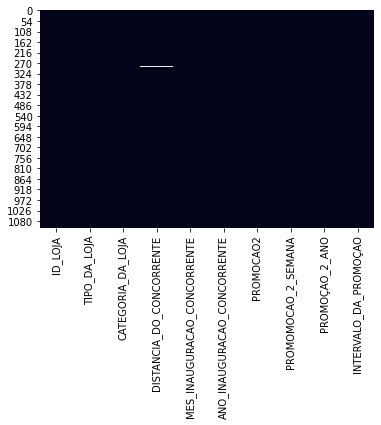

In [ ]:
sns.heatmap(dados_loja.isnull(), cbar = False);

In [ ]:
dados_loja['DISTANCIA_DO_CONCORRENTE'].fillna(dados_loja['DISTANCIA_DO_CONCORRENTE'].mean(), inplace = True)

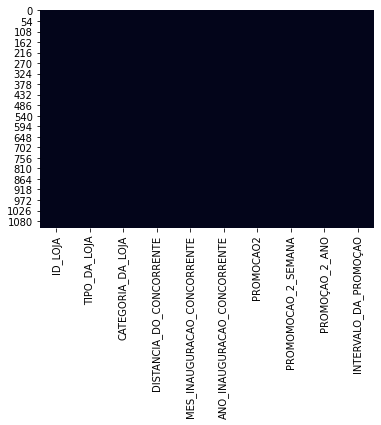

In [ ]:
sns.heatmap(dados_loja.isnull(), cbar = False);

In [ ]:
dados_loja['ANO_INAUGURACAO_CONCORRENTE'].value_counts()

0.0       354
2013.0     83
2012.0     82
2014.0     70
2005.0     62
2010.0     55
2008.0     54
2009.0     54
2011.0     54
2007.0     48
2006.0     47
2015.0     38
2002.0     27
2004.0     22
2003.0     19
2001.0     16
2000.0     10
1999.0      8
1990.0      5
1995.0      2
1994.0      2
1961.0      1
1900.0      1
1998.0      1
Name: ANO_INAUGURACAO_CONCORRENTE, dtype: int64

In [ ]:
dados_loja['MES_INAUGURACAO_CONCORRENTE'].value_counts()

0.0     354
9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: MES_INAUGURACAO_CONCORRENTE, dtype: int64

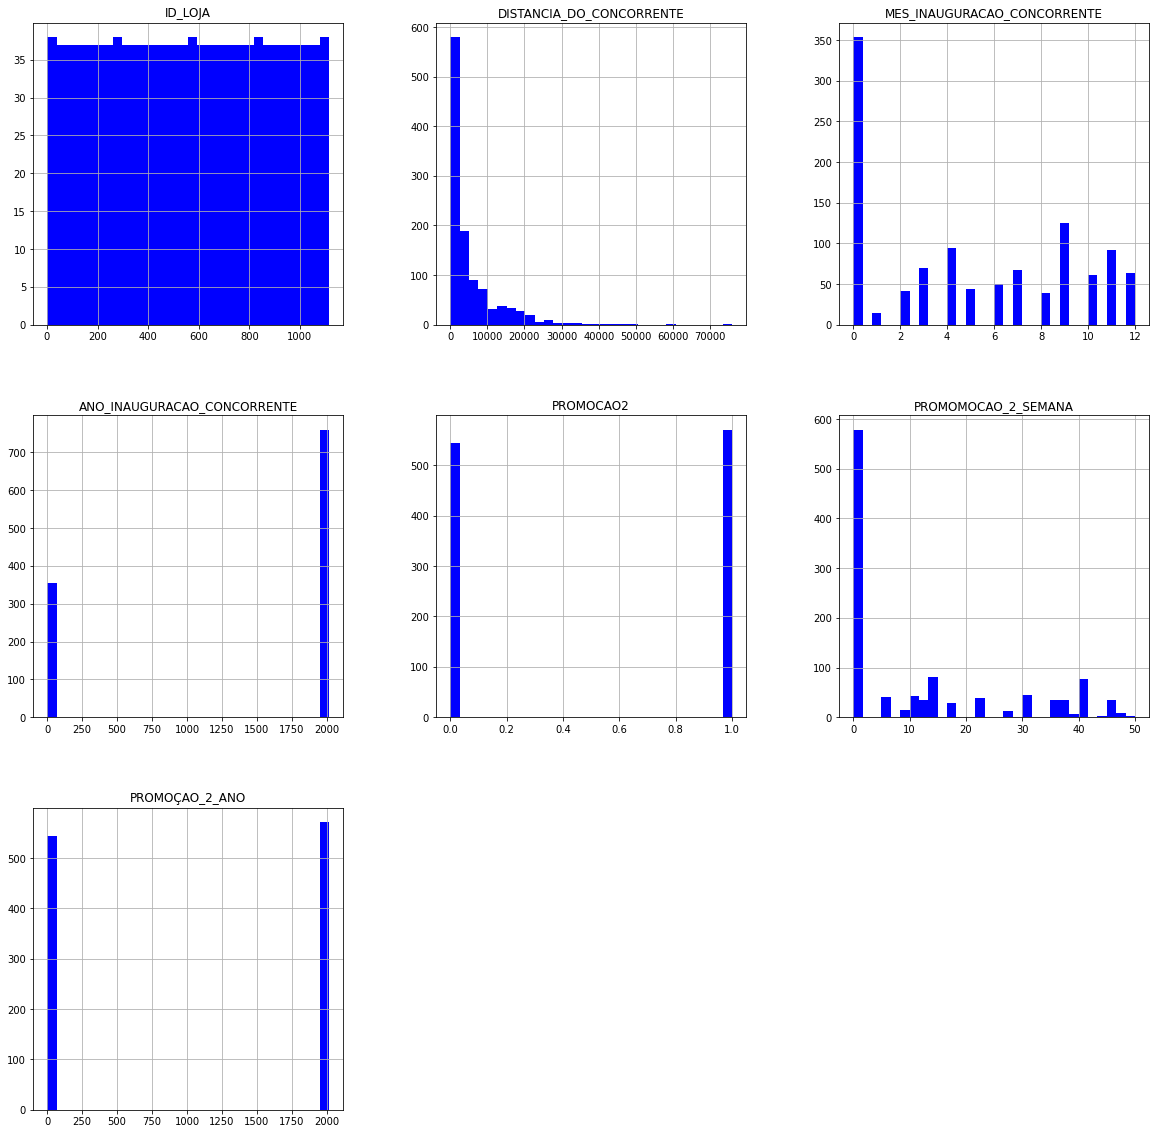

In [ ]:
dados_loja.hist(bins = 30, figsize=(20,20), color = 'b');

### Dados unidos (vendas + lojas)

In [ ]:
dados_loja.head()

,ID_LOJA,TIPO_DA_LOJA,CATEGORIA_DA_LOJA,DISTANCIA_DO_CONCORRENTE,MES_INAUGURACAO_CONCORRENTE,ANO_INAUGURACAO_CONCORRENTE,PROMOCAO2,PROMOMOCAO_2_SEMANA,PROMOÇAO_2_ANO,INTERVALO_DA_PROMOÇAO
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
dados_vendas.head()

,ID_LOJA,DIA_DA_SEMANA,DATA,VENDAS,NUMERO_DE_CLIENTES,ABERTA,PROMO,OUTROS_FERIADOS,FERIADO_ESCOLAR
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
dados_totais = pd.merge(dados_loja, dados_vendas, how = 'inner', on = 'ID_LOJA')

In [ ]:
dados_totais.shape

(1017209, 18)

In [ ]:
dados_totais.tail()

,ID_LOJA,TIPO_DA_LOJA,CATEGORIA_DA_LOJA,DISTANCIA_DO_CONCORRENTE,MES_INAUGURACAO_CONCORRENTE,ANO_INAUGURACAO_CONCORRENTE,PROMOCAO2,PROMOMOCAO_2_SEMANA,PROMOÇAO_2_ANO,INTERVALO_DA_PROMOÇAO,DIA_DA_SEMANA,DATA,VENDAS,NUMERO_DE_CLIENTES,ABERTA,PROMO,OUTROS_FERIADOS,FERIADO_ESCOLAR
1017204,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1
1017208,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2,2013-01-01,0,0,0,0,a,1


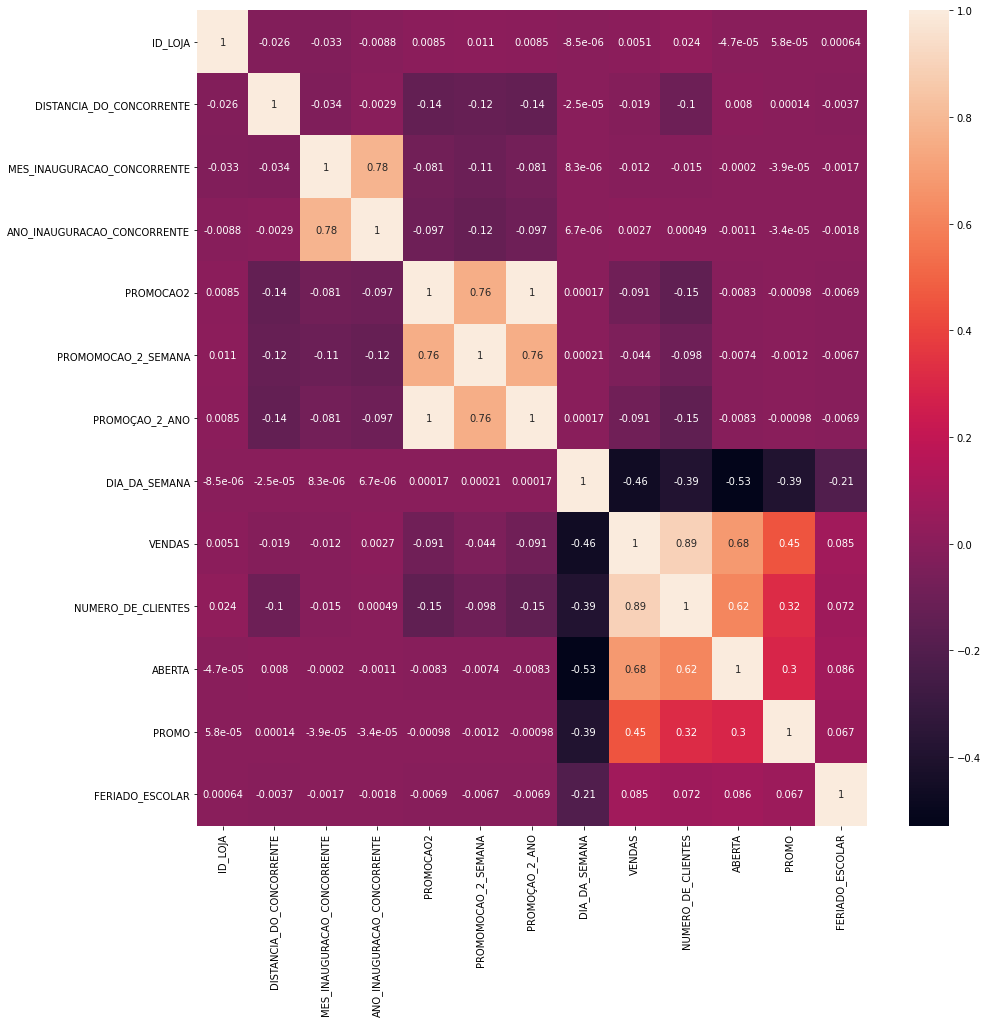

In [ ]:
correlations = dados_totais.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, annot = True);

In [ ]:
correlations = dados_totais.corr()['VENDAS'].sort_values()
correlations

DIA_DA_SEMANA                 -0.462125
PROMOÇAO_2_ANO                -0.091056
PROMOCAO2                     -0.091040
PROMOMOCAO_2_SEMANA           -0.044143
DISTANCIA_DO_CONCORRENTE      -0.019207
MES_INAUGURACAO_CONCORRENTE   -0.012431
ANO_INAUGURACAO_CONCORRENTE    0.002749
ID_LOJA                        0.005126
FERIADO_ESCOLAR                0.085124
PROMO                          0.452345
ABERTA                         0.678472
NUMERO_DE_CLIENTES             0.894711
VENDAS                         1.000000
Name: VENDAS, dtype: float64

In [ ]:
dados_totais['ANO'] = pd.DatetimeIndex(dados_totais['DATA']).year

In [ ]:
dados_totais.head()

,ID_LOJA,TIPO_DA_LOJA,CATEGORIA_DA_LOJA,DISTANCIA_DO_CONCORRENTE,MES_INAUGURACAO_CONCORRENTE,ANO_INAUGURACAO_CONCORRENTE,PROMOCAO2,PROMOMOCAO_2_SEMANA,PROMOÇAO_2_ANO,INTERVALO_DA_PROMOÇAO,DIA_DA_SEMANA,DATA,VENDAS,NUMERO_DE_CLIENTES,ABERTA,PROMO,OUTROS_FERIADOS,FERIADO_ESCOLAR,ANO
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,1,0,1,2015
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,1,0,1,2015
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,1,0,1,2015
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,1,0,1,2015
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,1,0,1,2015


In [ ]:
dados_totais['MES'] = pd.DatetimeIndex(dados_totais['DATA']).month
dados_totais['DIA'] = pd.DatetimeIndex(dados_totais['DATA']).day

In [ ]:
dados_totais.head()

,ID_LOJA,TIPO_DA_LOJA,CATEGORIA_DA_LOJA,DISTANCIA_DO_CONCORRENTE,MES_INAUGURACAO_CONCORRENTE,ANO_INAUGURACAO_CONCORRENTE,PROMOCAO2,PROMOMOCAO_2_SEMANA,PROMOÇAO_2_ANO,INTERVALO_DA_PROMOÇAO,DIA_DA_SEMANA,DATA,VENDAS,NUMERO_DE_CLIENTES,ABERTA,PROMO,OUTROS_FERIADOS,FERIADO_ESCOLAR,ANO,MES,DIA
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,1,0,1,2015,7,30
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,1,0,1,2015,7,29
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,1,0,1,2015,7,28
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,1,0,1,2015,7,27


Text(0.5, 1.0, 'Média de vendas por mês')

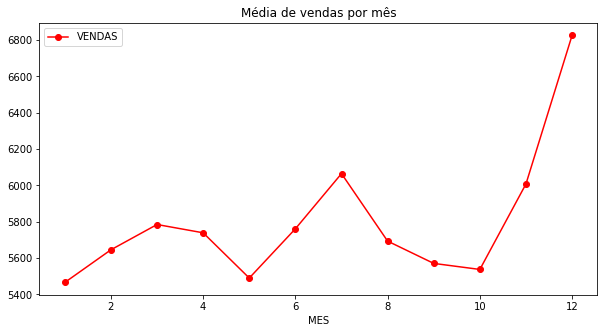

In [ ]:
axis = dados_totais.groupby('MES')[['VENDAS']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por mês')

Text(0.5, 1.0, 'Média de clientes por mês')

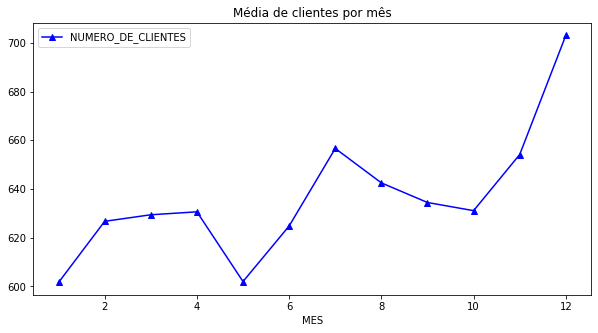

In [ ]:
axis = dados_totais.groupby('MES')[['NUMERO_DE_CLIENTES']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por mês')

Text(0.5, 1.0, 'Média de vendas por dia')

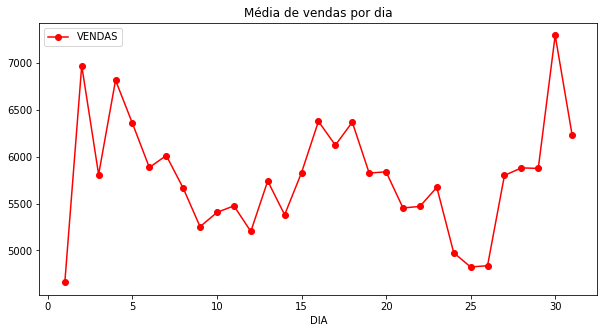

In [ ]:
axis = dados_totais.groupby('DIA')[['VENDAS']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia')

Text(0.5, 1.0, 'Média de clientes por dia')

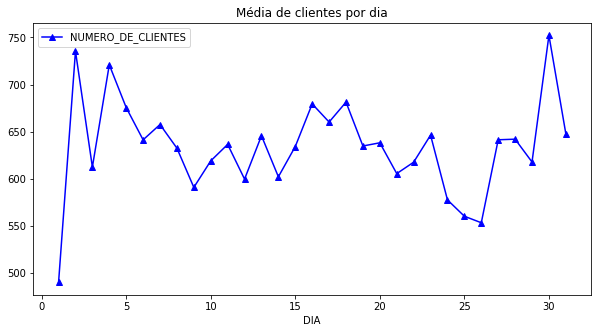

In [ ]:
axis = dados_totais.groupby('DIA')[['NUMERO_DE_CLIENTES']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia')

Text(0.5, 1.0, 'Média de vendas por dia da semana')

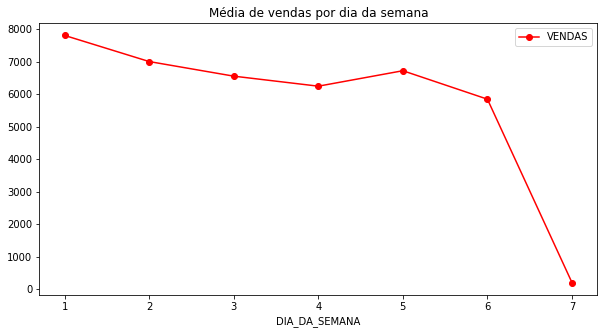

In [ ]:
axis = dados_totais.groupby('DIA_DA_SEMANA')[['VENDAS']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia da semana')

Text(0.5, 1.0, 'Média de clientes por dia da semana')

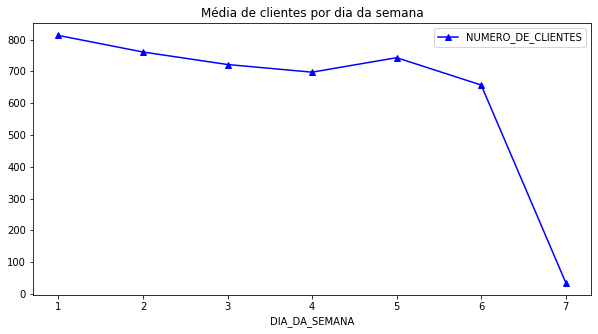

In [ ]:
axis = dados_totais.groupby('DIA_DA_SEMANA')[['NUMERO_DE_CLIENTES']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia da semana')

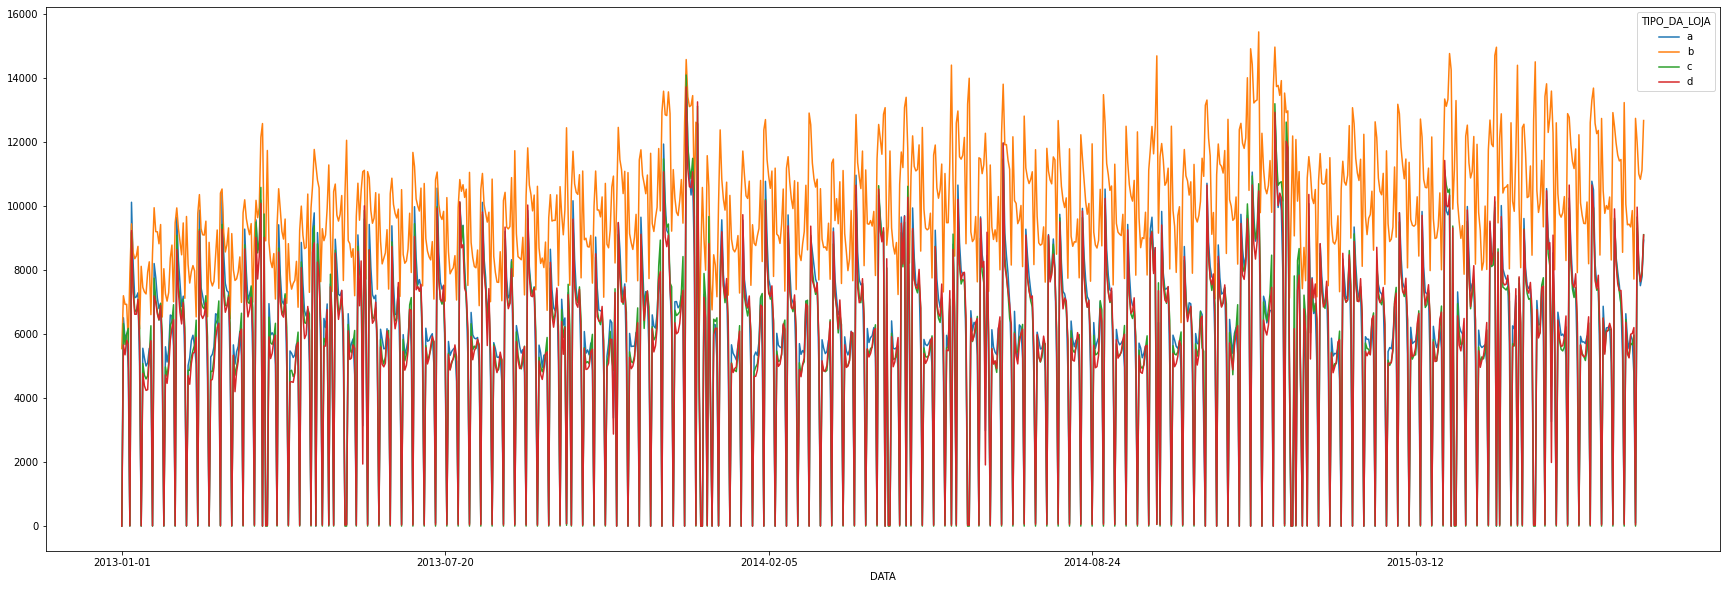

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))
dados_totais.groupby(['DATA', 'TIPO_DA_LOJA']).mean()['VENDAS'].unstack().plot(ax = ax)

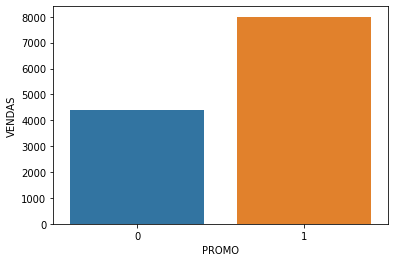

In [ ]:
sns.barplot(x = 'PROMO', y = 'VENDAS', data = dados_totais);

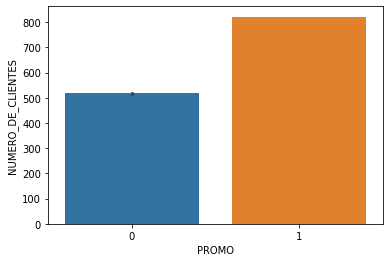

In [ ]:
sns.barplot(x = 'PROMO', y = 'NUMERO_DE_CLIENTES', data = dados_totais);

## Treinamento do modelo - parte 1

In [ ]:
!pip install fbprophet

## Treinamento do modelo 


   - StateHoliday: Normalmente todas as lojas estão fechadas nesses feriados. As escolas estão fechadas nesses feriados e nos finais de semana. Legenda: a = public holiday, b = Páscoa, c = Natal, 0 = Nenhum feriado
   - SchoolHoliday: indica se a loja foi afetada pelo feriado escolar
  






In [ ]:
from fbprophet import Prophet

In [ ]:
feriados_escolares = dados_totais[dados_totais['FERIADO_ESCOLAR'] == 1].loc[:, 'DATA'].values
feriados_escolares

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-03',
       '2013-01-02', '2013-01-01'], dtype=object)

In [ ]:
len(np.unique(feriados_escolares))

478

In [ ]:
 outros_feriados= dados_totais[(dados_totais['OUTROS_FERIADOS'] == 'a') | 
                              (dados_totais['OUTROS_FERIADOS'] == 'b') |
                              (dados_totais['OUTROS_FERIADOS'] == 'c')].loc[:,'DATA'].values

In [ ]:
outros_feriados.shape

(31050,)

In [ ]:
len(np.unique(outros_feriados))

37

In [ ]:
outros_feriados = pd.DataFrame({'ds': pd.to_datetime(outros_feriados),
                               'holiday': 'state_holiday'})
outros_feriados

,ds,holiday
0,2015-06-04,state_holiday
1,2015-05-25,state_holiday
2,2015-05-14,state_holiday
3,2015-05-01,state_holiday
4,2015-04-06,state_holiday
...,...,...
31045,2013-05-09,state_holiday
31046,2013-05-01,state_holiday
31047,2013-04-01,state_holiday
31048,2013-03-29,state_holiday


In [ ]:
feriados_escolares = pd.DataFrame({'ds': pd.to_datetime(feriados_escolares),
                               'holiday': 'school_holiday'})
feriados_escolares

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
181716,2013-01-05,school_holiday
181717,2013-01-04,school_holiday
181718,2013-01-03,school_holiday
181719,2013-01-02,school_holiday


In [ ]:
feriados = pd.concat((outros_feriados, feriados_escolares))
feriados

,ds,holiday
0,2015-06-04,state_holiday
1,2015-05-25,state_holiday
2,2015-05-14,state_holiday
3,2015-05-01,state_holiday
4,2015-04-06,state_holiday
...,...,...
181716,2013-01-05,school_holiday
181717,2013-01-04,school_holiday
181718,2013-01-03,school_holiday
181719,2013-01-02,school_holiday


In [ ]:
# Date: ds
# Sales: y
def previsao_vendas(id_loja, vendas_df, feriados, periodo):
  vendas_df = vendas_df[vendas_df['ID_LOJA'] == id_loja]
  vendas_df = vendas_df[['DATA', 'VENDAS']].rename(columns = {'DATA': 'ds', 'VENDAS': 'y'})
  vendas_df = vendas_df.sort_values(by = 'ds')

  model = Prophet(holidays=feriados)
  model.fit(vendas_df)
  futuro = model.make_future_dataframe(periods = periodo)
  previsao = model.predict(futuro)
  figure1 = model.plot(previsao, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(previsao)

  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


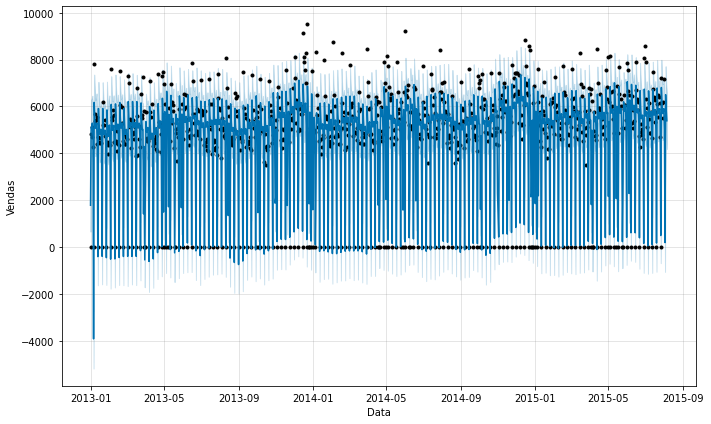

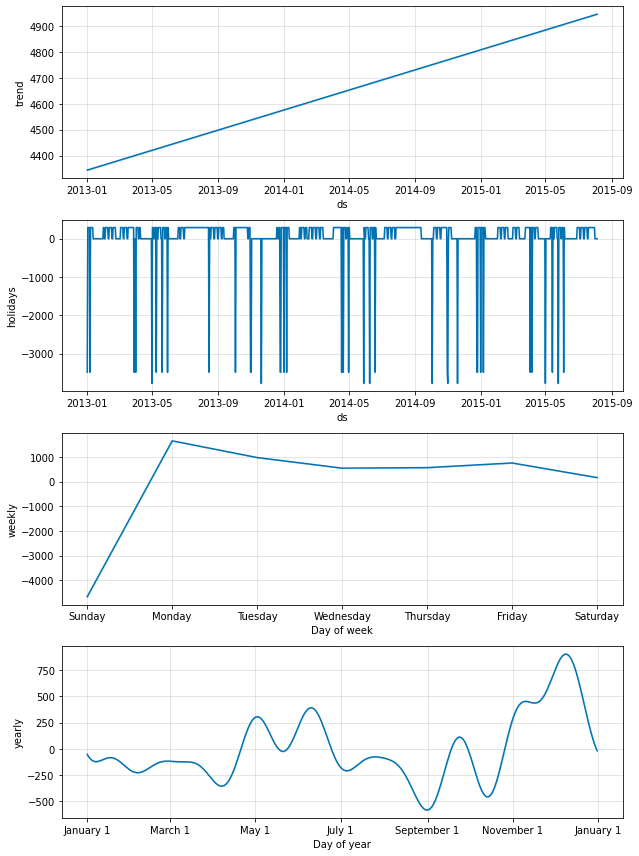

In [ ]:
 df_previsao = previsao_vendas(10, dados_totais, feriados, 5)

NameError: ignored